# Importing all libraries

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [52]:
pip install num2words

Note: you may need to restart the kernel to use updated packages.


In [53]:
from num2words import num2words

# Original dataframe 

In [54]:
data_path = "C:\\Users\\PRIYANKA\\OneDrive\\Documents\\Python practice sessions\\Student\\Student Attitude and Behavior.csv"
df = pd.read_csv(data_path)
df.head(2)

,Certification Course,Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,College mark,Hobbies,Daily study time,Preferreed study time,Salary expectation,Like degree,Pursue degree related career,Social media consumption,Travelling time,Stress level,Financial status,Current part-time job
0,No,Male,BCA,100.0,58.0,79.0,64.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No


# The original dataframe has 235 rows and 19 columns. There are no missing values in the dataset

In [55]:
df.shape

(235, 19)

In [56]:
print(df.isnull().sum())

Certification Course            0
Gender                          0
Department                      0
Height(CM)                      0
Weight(KG)                      0
10th Mark                       0
12th Mark                       0
College mark                    0
Hobbies                         0
Daily study time                0
Preferreed study time           0
Salary expectation              0
Like degree                     0
Pursue degree related career    0
Social media consumption        0
Travelling time                 0
Stress level                    0
Financial status                0
Current part-time job           0
dtype: int64


# Data description of the original dataset

In [57]:
df.describe()

,Height(CM),Weight(KG),10th Mark,12th Mark,College mark,Salary expectation
count,235.000000,235.000000,235.000000,235.000000,235.000000,2.350000e+02
mean,157.402128,60.803830,76.848511,68.775872,70.660553,3.248168e+04
std,21.510805,14.895844,13.047560,11.018192,15.727446,1.113146e+05
min,4.500000,20.000000,7.400000,45.000000,1.000000,0.000000e+00
25%,152.000000,50.000000,70.000000,60.000000,60.000000,1.500000e+04
50%,160.000000,60.000000,80.000000,69.000000,70.000000,2.000000e+04
75%,170.000000,70.000000,86.250000,76.000000,80.000000,2.500000e+04
max,192.000000,106.000000,98.000000,94.000000,100.000000,1.500000e+06


# Method to convert datatype of one column from number to words
- Copy the dataframe to a new variable
- Define 'number to words'
- Use the column name in the code and run the dataframe

In [58]:
newdf = df.copy()

In [59]:
def number_to_words(number):
    return num2words(number)

In [60]:
newdf['Salary expectation'] = newdf['Salary expectation'].apply(number_to_words)
print(newdf)

    Certification Course  Gender Department  Height(CM)  Weight(KG)  \
0                     No    Male        BCA       100.0        58.0   
1                     No  Female        BCA        90.0        40.0   
2                    Yes    Male        BCA       159.0        78.0   
3                    Yes  Female        BCA       147.0        20.0   
4                     No    Male        BCA       170.0        54.0   
..                   ...     ...        ...         ...         ...   
230                  Yes    Male  B.com ISM       170.0        76.0   
231                  Yes    Male  B.com ISM       172.0        52.0   
232                  Yes  Female        BCA       139.0        33.0   
233                  Yes  Female   Commerce       153.0        58.0   
234                   No  Female  B.com ISM       155.0        39.0   

     10th Mark  12th Mark  College mark        Hobbies Daily study time  \
0         79.0       64.0          80.0    Video Games    0 - 30 minute 

# Method to convert datatype of one column from words to numbers

In [61]:
newdf['Current part-time job'] = df['Current part-time job'].replace({'Yes': 1, 'No': 2})
print(newdf)

    Certification Course  Gender Department  Height(CM)  Weight(KG)  \
0                     No    Male        BCA       100.0        58.0   
1                     No  Female        BCA        90.0        40.0   
2                    Yes    Male        BCA       159.0        78.0   
3                    Yes  Female        BCA       147.0        20.0   
4                     No    Male        BCA       170.0        54.0   
..                   ...     ...        ...         ...         ...   
230                  Yes    Male  B.com ISM       170.0        76.0   
231                  Yes    Male  B.com ISM       172.0        52.0   
232                  Yes  Female        BCA       139.0        33.0   
233                  Yes  Female   Commerce       153.0        58.0   
234                   No  Female  B.com ISM       155.0        39.0   

     10th Mark  12th Mark  College mark        Hobbies Daily study time  \
0         79.0       64.0          80.0    Video Games    0 - 30 minute 

# Viewing unique values in one column at a time and unique values for all columns at once

In [62]:
unique = df['Pursue degree related career'].unique()
print(unique)

['50%' '75%' '25%' '100%' '0%']


In [63]:
uniqueall = df.apply(pd.Series.unique)
print(uniqueall)

Certification Course                                                    [No, Yes]
Gender                                                             [Male, Female]
Department                      [BCA, Commerce, B.com Accounting and Finance ,...
Height(CM)                      [100.0, 90.0, 159.0, 147.0, 170.0, 139.0, 165....
Weight(KG)                      [58.0, 40.0, 78.0, 20.0, 54.0, 33.0, 50.0, 43....
10th Mark                       [79.0, 70.0, 71.0, 40.0, 90.0, 61.6, 88.2, 60....
12th Mark                       [64.0, 80.0, 61.0, 59.0, 65.0, 75.0, 63.0, 61....
College mark                    [80.0, 70.0, 55.0, 58.0, 30.0, 3.0, 75.0, 60.0...
Hobbies                              [Video Games, Cinema, Reading books, Sports]
Daily study time                [0 - 30 minute, 30 - 60 minute, 1 - 2 Hour, 2 ...
Preferreed study time                                   [Morning, Anytime, Night]
Salary expectation              [40000, 15000, 13000, 1500000, 50000, 20000, 2...
Like degree     

# Verifying data normalcy, formatting outliers and finding the mean and median
- Apart from 'Salary expectation' variable, all data is normal

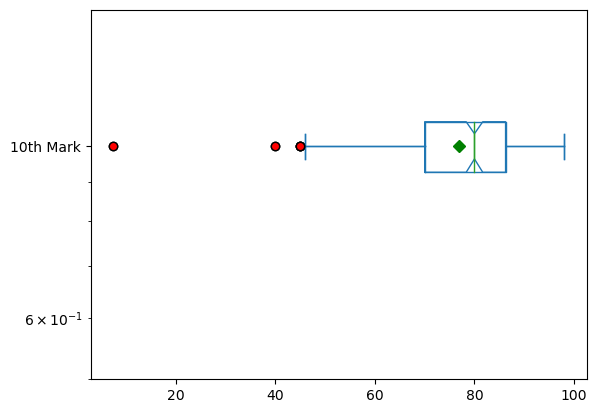

In [70]:
df['10th Mark'].plot(kind='box',vert=False);
plt.semilogy()
red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor = 'green')
df['10th Mark'].plot(kind='box',vert=False, flierprops = red_circle, showmeans=True, meanprops = mean_shape, notch=True);

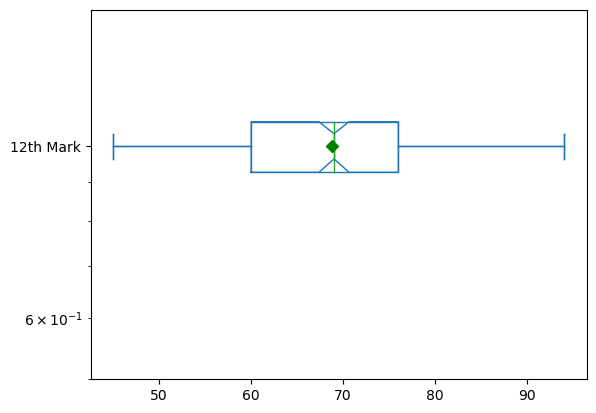

In [71]:
df['12th Mark'].plot(kind='box',vert=False);
plt.semilogy()
red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor = 'green')
df['12th Mark'].plot(kind='box',vert=False, flierprops = red_circle, showmeans=True, meanprops = mean_shape, notch=True);

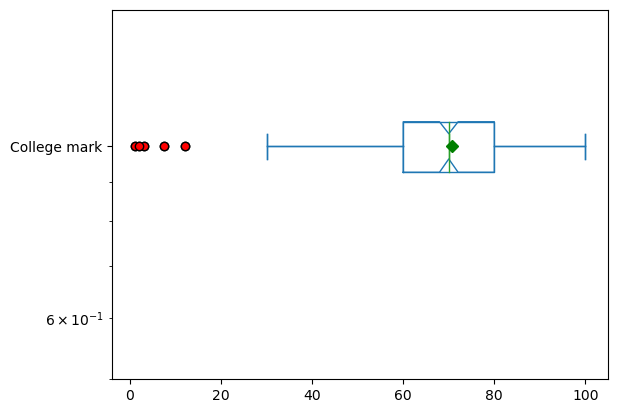

In [73]:
df['College mark'].plot(kind='box',vert=False);
plt.semilogy()
red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor = 'green')
df['College mark'].plot(kind='box',vert=False, flierprops = red_circle, showmeans=True, meanprops = mean_shape, notch=True);

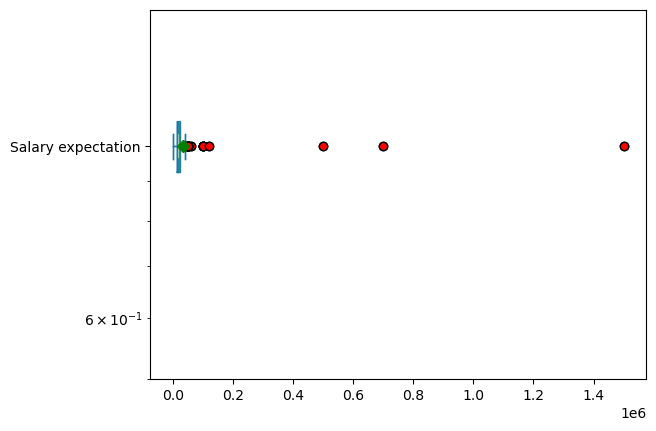

In [74]:
df['Salary expectation'].plot(kind='box',vert=False);
plt.semilogy()
red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor = 'green')
df['Salary expectation'].plot(kind='box',vert=False, flierprops = red_circle, showmeans=True, meanprops = mean_shape, notch=True);

# Normalizing one variable in dataframe - 'Salary expectation'

In [77]:
Q1 = df['Salary expectation'].quantile(0.25)
Q3 = df['Salary expectation'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
normal = df[(df['Salary expectation'] >= lower_bound) & (df['Salary expectation'] <= upper_bound)]
print(normal)

    Certification Course  Gender Department  Height(CM)  Weight(KG)  \
0                     No    Male        BCA       100.0        58.0   
1                     No  Female        BCA        90.0        40.0   
2                    Yes    Male        BCA       159.0        78.0   
5                    Yes  Female        BCA       139.0        33.0   
6                    Yes    Male        BCA       165.0        50.0   
..                   ...     ...        ...         ...         ...   
230                  Yes    Male  B.com ISM       170.0        76.0   
231                  Yes    Male  B.com ISM       172.0        52.0   
232                  Yes  Female        BCA       139.0        33.0   
233                  Yes  Female   Commerce       153.0        58.0   
234                   No  Female  B.com ISM       155.0        39.0   

     10th Mark  12th Mark  College mark        Hobbies Daily study time  \
0         79.0       64.0          80.0    Video Games    0 - 30 minute 

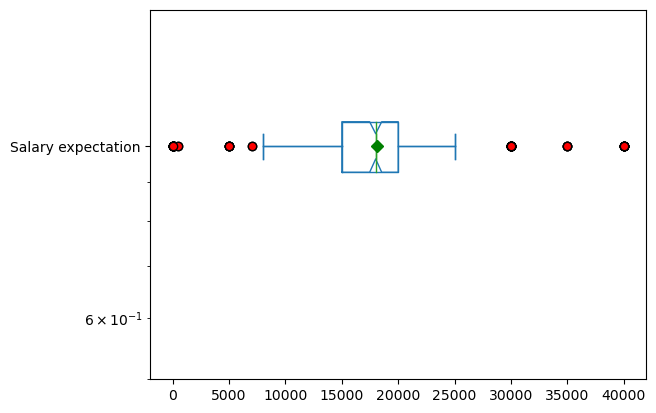

In [78]:
normal['Salary expectation'].plot(kind='box',vert=False);
plt.semilogy()
red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor = 'green')
normal['Salary expectation'].plot(kind='box',vert=False, flierprops = red_circle, showmeans=True, meanprops = mean_shape, notch=True);

# Before normalizing the data, there were 253 rows, now there are 216 rows

In [80]:
normal.shape

(216, 19)

# Mean, mode and std.dev of normalized dataset
- The average 10th std marks were 77%
- The average 12th std marks were 69%
- The average marks in college were 70%
- The average salary expectation was INR 18,093 (with a std dev of INR 7371)

In [81]:
mean_values = normal.mean()
mean_values

C:\Users\PRIYANKA\AppData\Local\Temp\ipykernel_122144\1978448701.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = normal.mean()


Height(CM)              157.206019
Weight(KG)               60.874537
10th Mark                77.350000
12th Mark                69.073287
College mark             70.939491
Salary expectation    18093.495370
dtype: float64

In [82]:
mode_values = normal.mode()
mode_values

,Certification Course,Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,College mark,Hobbies,Daily study time,Preferreed study time,Salary expectation,Like degree,Pursue degree related career,Social media consumption,Travelling time,Stress level,Financial status,Current part-time job
0,Yes,Male,BCA,160.0,60.0,75.0,60.0,70.0,Sports,30 - 60 minute,Anytime,20000.0,Yes,75%,30 - 60 Minute,30 - 60 minutes,Good,good,No
1,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
std_dev = normal.std()
std_dev

C:\Users\PRIYANKA\AppData\Local\Temp\ipykernel_122144\396885006.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std_dev = normal.std()


Height(CM)              21.618692
Weight(KG)              14.727922
10th Mark               12.846949
12th Mark               10.857030
College mark            15.536379
Salary expectation    7371.410360
dtype: float64